<div style="text-align: center; border: 2px solid #3d59c6; padding: 20px; border-radius: 10px; background-color: #ffffff;">
    <h1 style="color: #3d59c6; margin-bottom: 5px;">MD004: Estadística</h1>
    <h2 style="color: #000000; margin-top: 0;">AC08: BAYES - Detección de Polaridad en Apps Móviles</h2>
    <hr style="border: 1px solid #3d59c6; width: 50%; margin: 20px auto;">
    <p style="font-size: 16px; color: #000000;">
        <strong>Alumno:</strong> Gerard Pascual Fontanilles <br>
        <strong>Fecha:</strong> 4/02/2026
    </p>
</div>

El csv “sentiment_dataset” incluye reviews que han dejado usuarios en la Google Play Store en referencia a 23 apps, incluyendo una valoración categórica sobre el análisis de sentimiento.

Los datos son los siguientes:

* package_name: Nombre de la app
* review: Texto del usuario con la review
* polarity: Sentimiento de polaridad de la review:
    * 1: Review con un sentimiento muy positivo o muy negativo
    * 0: Review con un sentimiento neutro

## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

In [1]:
install.packages('slam')
install.packages('tm')
install.packages('SnowballC')
install.packages('gmodels')
install.packages('wordcloud')
install.packages("e1071")
library(e1071)
library(caret)
library(tm)
library(SnowballC)
library(wordcloud)
library(gmodels)
library(wordcloud)
library(dplyr)
library(pROC)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:e1071’:

    element


Loading required package: lattice

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


Loading required package: RColorBrewer


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, 

## <font color='#3d59c6'>  1. CARGA DE DATOS </font>

In [2]:
df <- read.csv("sentiment_dataset.csv", stringsAsFactors = FALSE)

In [3]:
head(df)

,package_name,review,polarity
,<chr>,<chr>,<int>
1,com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0
2,com.facebook.katana,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0
3,com.facebook.katana,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0
4,com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0
5,com.facebook.katana,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0
6,com.facebook.katana,"idk i can't edit my posts? things such as my profile picture, when i edit it, it becomes grey and says that it is no longer available. please fix. i have an htc desire. will rate 5 stars shown fixed đ",0


In [4]:
str(df)

'data.frame':	891 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity    : int  0 0 0 0 0 0 0 0 0 0 ...


El dataset vemos que se ha cargado correctamente y no parece haber ningún error con los datos.

## <font color='#3d59c6'>  2. REALIZAR ANÁLISIS DESCRIPTIVO</font>

In [5]:
summary(df)

 package_name          review             polarity     
 Length:891         Length:891         Min.   :0.0000  
 Class :character   Class :character   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Median :0.0000  
                                       Mean   :0.3446  
                                       3rd Qu.:1.0000  
                                       Max.   :1.0000  

In [6]:
sapply(df, function(x) length(unique(x)))

package_name       review     polarity 
          23          891            2

In [7]:
table(df$package_name)


        com.android.chrome        com.dropbox.android 
                        39                         40 
              com.evernote        com.facebook.katana 
                        40                         40 
         com.facebook.orca    com.google.android.talk 
                        40                         39 
         com.hamrokeyboard             com.hamropatro 
                        39                         38 
     com.imangi.templerun2    com.king.candycrushsaga 
                        40                         40 
      com.linkedin.android      com.opera.mini.native 
                        40                         40 
      com.rovio.angrybirds    com.shirantech.kantipur 
                        39                         36 
                 com.Slack com.supercell.clashofclans 
                        40                         40 
            com.tencent.mm        com.twitter.android 
                        39                         39 
         

In [8]:
table(df$polarity)
prop.table(table(df$polarity))


  0   1 
584 307 


        0         1 
0.6554433 0.3445567 

In [9]:
sum(is.na(df))

[1] 0

In [10]:
sum(duplicated(df))

[1] 0

### Resumen General

El conjunto de datos (`sentiment_dataset`) está compuesto por **891 observaciones** y **3 variables**. Se trata de un problema de clasificación binaria supervisada basada en procesamiento de lenguaje natural (NLP).

#### Integridad de los Datos

* **Valores Nulos (NAs):** 0. El dataset está completo.
* **Duplicados:** 0. No existen instancias repetidas, lo que garantiza que no hay sesgo por repetición idéntica de datos.

#### 1. Variable Objetivo: `polarity`

* **Distribución:**
    * **Clase 0 (Negativa/Neutra):** 584 instancias (**65.54%**).
    * **Clase 1 (Positiva):** 307 instancias (**34.46%**).
* Nos enfrentamos a un **dataset desbalanceado**. La clase negativa es la mayoritaria.
* Un modelo "tonto" que prediga siempre "0" tendría una *Accuracy* base del 65.5%. Nuestro modelo de Bayes debe superar este umbral para ser útil.


#### 2. Variable Predictora: `package_name` (Categórica)

Indica la aplicación a la que pertenece la review.

* Existen **23 aplicaciones** distintas.
* La distribución es bastante uniforme. La mayoría de las apps tienen entre **39 y 40 reviews**.
* Se observa una ligera menor representación en:
    * `jabanaki.todo.todoly`: 24 reviews (la menos representada).
    * `com.shirantech.kantipur`: 36 reviews.
* Al estar balanceado por aplicación, el modelo no debería sesgarse excesivamente hacia una app concreta por volumen de datos, aunque las apps con menos de 30 instancias podrían tener predicciones menos robustas.

#### 3. Variable de Texto: `review` (Texto libre)

Contiene el texto crudo escrito por los usuarios.

* **Tipo:** `Character` (String).
* Al ser texto no estructurado, requerirá técnicas de preprocesamiento para convertirlo en una matriz numérica que el algoritmo Naive Bayes pueda interpretar.

> El dataset es robusto y limpio (sin nulos ni duplicados), con un tamaño muestral de 891 instancias distribuidas equitativamente entre 23 aplicaciones. El principal desafío detectado en el descriptivo es el **desbalanceo de clases (65% vs 35%)**, lo que nos obligará a vigilar métricas como la *Sensibilidad* y la *Especificidad*, y no confiar únicamente en la *Accuracy* global.

## <font color='#3d59c6'> 3. LIMPIEZA DE INSTANCIAS (Preprocesamiento NLP)</font>

Para poder aplicar el algoritmo de **Naive Bayes**, es necesario transformar el texto no estructurado (las reviews en lenguaje natural) en una estructura matemática manejable. El texto "crudo" contiene mucho ruido que aumenta la dimensionalidad de la matriz de datos sin aportar valor predictivo sobre el sentimiento.

Para depurar el dataset, utilizaremos la librería `tm` (Text Mining) y `SnowballC` para aplicar la siguiente **Cleaning Pipeline**:

1. **Creación del Corpus:** Convertimos el vector de texto en un objeto `VCorpus`, que actúa como una colección de documentos manipulable por R.
2. **Normalización (Lowercasing):** Convertimos todo el texto a minúsculas. Esto es crucial para que el algoritmo entienda que palabras como *"App"*, *"APP"* y *"app"* son el mismo término, evitando duplicidades en el vocabulario.
3. **Eliminación de Ruido Numérico:** Eliminamos los números. En el contexto del análisis de sentimiento de apps, cifras como versiones ("v2.0") o tamaños ("50MB") generalmente no aportan carga emocional (positiva o negativa).
4. **Filtrado de Stopwords (Palabras Vacías):** Eliminamos palabras funcionales muy frecuentes que carecen de significado semántico relevante (artículos, preposiciones, pronombres).
    * Dado que el dataset está en inglés, utilizaremos el diccionario `stopwords("english")` para filtrar términos como *"the", "is", "at", "on"*.
5. **Eliminación de Puntuación:** Removemos signos de puntuación (puntos, comas, exclamaciones) para aislar las palabras clave.
6. **Stemming (Raíz léxica):** Aplicamos un algoritmo de *stemming* para reducir las palabras a su raíz morfológica (ej: *"playing", "played", "player"*  *"play"*). Esto reduce drásticamente el tamaño de la matriz de términos y ayuda al modelo a generalizar mejor al agrupar familias de palabras.
7. **Limpieza de Espacios:** Eliminamos los espacios en blanco sobrantes generados tras borrar las palabras anteriores.

In [11]:
corpus <- VCorpus(VectorSource(df$review))

writeLines(as.character(corpus[[1]]))

 privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.


In [12]:
corpus_clean <- tm_map(corpus, content_transformer(tolower))

corpus_clean <- tm_map(corpus_clean, removeNumbers)

corpus_clean <- tm_map(corpus_clean, removeWords, stopwords("english"))

corpus_clean <- tm_map(corpus_clean, removePunctuation)

corpus_clean <- tm_map(corpus_clean, stemDocument)

corpus_clean <- tm_map(corpus_clean, stripWhitespace)

writeLines(as.character(corpus_clean[[1]]))

privaci least put option appear offlin mean peopl like big pressur seen onlin like need respons everi messag els call seenzon wanna facebook read newsfe just wanna respons messag want pls reconsid review tri turn chat still can see onlin


### Análisis de Resultados de la Limpieza

Al comparar la review original con su versión procesada, observamos la efectividad de la tubería de limpieza para simplificar la información sin perder el contexto semántico (el significado).

**Transformaciones Clave:**

1. **Reducción de Ruido (Stopwords):**
    * **Antes:** *"i mean for some people like me it's a big pressure..."*
    * **Después:** *"mean peopl like big pressur..."*
    * Palabras como *"i", "for", "some", "me", "it's", "a"* han desaparecido. Esto es correcto porque son conectores gramaticales que no indican si el usuario está contento o enfadado. El modelo ahora se centra en los sustantivos y adjetivos importantes ("pressure", "big").


2. **Efecto del Stemming (Raíz Léxica):**
    * `privacy`  `privaci`
    * `message`  `messag`
    * `tried`  `tri`
    * `offline/online`  `offlin/onlin`
* Vemos cómo el algoritmo `SnowballC` corta las terminaciones. Aunque palabras como *"privaci"* o *"tri"* parecen errores ortográficos para un humano, para el algoritmo son perfectas. Permiten que si otro usuario escribe *"messaging"* o *"messages"*, el ordenador las trate a todas como el mismo token matemático `messag`, reduciendo la dispersión del vocabulario.


3. **Normalización:**
* Han desaparecido los signos de puntuación (puntos finales) y todas las letras están en minúsculas.
* Hemos transformado una frase compleja de **aprox. 60 palabras** en una lista de **tokens clave**, eliminando la variabilidad sintáctica pero conservando la "queja" del usuario sobre la privacidad y el estado "online".

> **Conclusión:** La limpieza ha sido exitosa. El texto resultante es ilegible gramaticalmente para un humano, pero mucho más denso informativamente para el clasificador Naive Bayes.

## <font color='#3d59c6'> 4. CREACIÓN DE MODELO CLASIFICADOR DE NAIVE BAYES </font> 

Estructuraremos el proceso en tres fases secuenciales que transforman el texto limpio en un modelo predictivo evaluable:

### 4.1. Ingeniería de Características (Matriz de Términos)

El algoritmo no puede procesar texto crudo. Transformaremos nuestro Corpus limpio en una **Document Term Matrix (DTM)**.

* **Reducción:** Filtraremos palabras poco frecuentes para eliminar ruido y reducir la dimensionalidad.
* **Binarización:** Convertiremos la frecuencia de palabras en variables categóricas ("Yes"/"No"), ya que la implementación estándar de Naive Bayes para texto suele funcionar mejor detectando presencia/ausencia en lugar de conteos absolutos.

### 4.2. Partición de Datos (Train / Test Split)

Para validar la capacidad de generalización del modelo y evitar el *overfitting* (memorización), dividiremos el dataset:

* **Entrenamiento (80%):** Datos con los que el algoritmo aprenderá las probabilidades condicionales.
* **Test (20%):** Datos "inéditos" reservados exclusivamente para la evaluación final.
* Utilizaremos un muestreo estratificado (`createDataPartition`) para asegurar que la proporción de sentimientos positivos y negativos se mantenga idéntica en ambos conjuntos.

### 4.3. Entrenamiento del Clasificador Base (Baseline)

Generaremos un primer modelo de **Naive Bayes** utilizando los parámetros estándar (Laplace = 1).

* **Objetivo:** Establecer una "Línea Base" de rendimiento.
* Evaluaremos su **Accuracy** (Exactitud) inicial, así como su Sensibilidad y Especificidad. Este resultado será el punto de referencia que intentaremos superar en la fase de optimización.

### <font color='#3d59c6'> 4.1 MATRIZ DE TÉRMINOS </font> 

Una vez limpio el texto, procedemos a convertir el corpus en una estructura matemática que el algoritmo pueda interpretar. Para ello utilizamos el modelo **Bag of Words** a través de una **Document Term Matrix (DTM)**.

En esta matriz:
   * Cada **fila** representa una review (documento).
   * Cada **columna** representa una palabra única del vocabulario (término).
   * Cada **celda** contiene la frecuencia de aparición de esa palabra en esa review.

#### Reducción de Dimensionalidad

Las matrices de texto suelen ser **dispersas (sparse)** y de muy alta dimensión, conteniendo miles de palabras que aparecen una única vez (nombres propios raros, errores tipográficos residuales, etc.). Estas palabras añaden ruido y complejidad computacional sin aportar valor predictivo generalizable.

Para optimizar el modelo, aplicaremos un filtro de frecuencia: **eliminaremos cualquier palabra que aparezca menos de 5 veces** en todo el conjunto de datos. Esto nos permitirá quedarnos con los términos "core" que realmente definen el sentimiento, reduciendo drásticamente el número de columnas (predictores) sin perder información relevante.

In [13]:
dtm <- DocumentTermMatrix(corpus_clean)

print(dtm)

<<DocumentTermMatrix (documents: 891, terms: 2903)>>
Non-/sparse entries: 16770/2569803
Sparsity           : 99%
Maximal term length: 56
Weighting          : term frequency (tf)


In [14]:
freq_terms <- findFreqTerms(dtm, 5)

dtm_reduced <- DocumentTermMatrix(corpus_clean, list(dictionary = freq_terms))

print(paste("Dimensiones originales:", dim(dtm)[2], "palabras."))
print(paste("Dimensiones reducidas:", dim(dtm_reduced)[2], "palabras."))

[1] "Dimensiones originales: 2903 palabras."
[1] "Dimensiones reducidas: 720 palabras."


### Análisis de la Matriz de Términos Generada

Tras la tokenización del corpus, hemos obtenido los siguientes resultados sobre la estructura de nuestros datos:

1. **Alta Dispersión (Sparsity 99%):**
La matriz original tiene una *sparsity* del 99%. Esto es completamente normal en minería de texto y significa que el 99% de las celdas de la matriz son ceros.
* Dado que cada review es una frase corta, apenas contiene una fracción minúscula del vocabulario total (2903 palabras). Matemáticamente, esto genera una matriz "hueca".

2. **Reducción de Dimensionalidad (Feature Selection):**
Hemos aplicado un filtro de frecuencia mínima (palabras que aparecen al menos 5 veces) para depurar el modelo.
    * **Antes:** 2903 palabras (features).
    * **Después:** 720 palabras (features).
    * Hemos eliminado el **75% del vocabulario** original.

>Esta reducción masiva es beneficiosa. Las más de 2000 palabras eliminadas eran términos muy raros que, de haberse incluido, habrían provocado **overfitting** (el modelo memorizaría casos anecdóticos en lugar de aprender patrones generales). Quedarnos con 720 predictores para 891 instancias es una proporción mucho más equilibrada para entrenar un algoritmo estadístico.

### <font color='#3d59c6'> 4.2 SEPARACION TRAIN/TEST </font>

Antes de entrenar el modelo, debemos adaptar la matriz numérica a las necesidades específicas del algoritmo Naive Bayes y garantizar una evaluación justa.

#### Binarización de Frecuencias (Bernoulli Naive Bayes)

Aunque la matriz actual contiene la frecuencia de las palabras (cuántas veces aparece "error" en una review), para textos cortos como las reviews de apps, el modelo suele funcionar mejor simplificando la información a **Presencia/Ausencia**.

* **Transformación:** Convertiremos cualquier valor mayor a 0 en "Yes" (la palabra está) y los 0 en "No" (la palabra no está).
* Esto reduce el ruido y evita que una palabra repetida muchas veces en una sola review distorsione las probabilidades globales.

#### Conversión de la Variable Objetivo

La variable `polarity` (0/1) es numérica en el CSV original. Es imperativo convertirla a **Factor** (categoría), ya que vamos a realizar una clasificación, no una regresión lineal.

#### Partición Estratificada (Train / Test Split)

Dividiremos los datos en dos conjuntos: **Entrenamiento (80%)** y **Test (20%)**.

* Como vimos en el análisis descriptivo, las clases están desbalanceadas (65% negativas vs 35% positivas). Un corte aleatorio simple podría dejarnos con muy pocas reviews positivas en el Test.
* Utilizaremos `createDataPartition` de la librería `caret` para realizar un **muestreo estratificado**. Esto fuerza a R a mantener exactamente la misma proporción de sentimientos en ambos grupos, asegurando que la evaluación sea estadísticamente representativa.
* Fijamos una semilla (`set.seed(123)`) para que los resultados sean idénticos en cada ejecución.

In [15]:
convert_counts <- function(x) {
  x <- ifelse(x > 0, "Yes", "No")
}

dtm_binary <- apply(dtm_reduced, MARGIN = 2, convert_counts)

data_model <- as.data.frame(dtm_binary)

data_model$polarity <- as.factor(df$polarity)

In [16]:
set.seed(123) 

train_index <- createDataPartition(data_model$polarity, p = 0.80, list = FALSE)

data_train <- data_model[train_index, ]
data_test  <- data_model[-train_index, ]

In [17]:
print(paste("Filas Entrenamiento:", nrow(data_train)))
print(paste("Filas Test:", nrow(data_test)))
print("Proporción en Train:")
print(prop.table(table(data_train$polarity)))
print("Proporción en Test:")
print(prop.table(table(data_test$polarity)))

[1] "Filas Entrenamiento: 714"
[1] "Filas Test: 177"
[1] "Proporción en Train:"

        0         1 
0.6554622 0.3445378 
[1] "Proporción en Test:"

        0         1 
0.6553672 0.3446328 


### Verificación de la Partición (Stratified Sampling)

Los resultados obtenidos confirman que la división de datos se ha realizado correctamente bajo los criterios de **muestreo estratificado**:

1. **Dimensiones del Split (80/20):**
    * **Train (714 observaciones):** Contiene el grueso de los datos (80%), proporcionando suficiente volumen para que el algoritmo aprenda patrones estadísticos robustos.
    * **Test (177 observaciones):** Contiene el 20% restante, reservado estrictamente para una evaluación honesta fuera de la muestra (*out-of-sample*).

2. **Distribución de Clases (Consistency):**
Lo más relevante es observar las proporciones de la variable objetivo `polarity`:
    * **Train:** 65.55% Negativo (0) / 34.45% Positivo (1).
    * **Test:** 65.54% Negativo (0) / 34.46% Positivo (1).



> **Validación:** La función `createDataPartition` ha funcionado a la perfección, manteniendo proporciones idénticas en ambos subconjuntos (con variaciones despreciables en el cuarto decimal). Esto es crucial en datasets desbalanceados como este, ya que garantiza que el conjunto de prueba es **representativo** de la realidad y evita sesgos de selección (por ejemplo, que por puro azar el Test set hubiera quedado lleno solo de reviews positivas, lo que falsearía la Accuracy final).

### <font color='#3d59c6'> 4.3 CLASIFICADOR NAIVE BAYES </font>

Antes de intentar optimizar el modelo mediante bucles o ajuste de hiperparámetros, es imprescindible establecer una **Línea Base (Baseline)**. Este primer modelo servirá como punto de referencia para medir la efectividad de nuestras futuras mejoras.

Para este primer entrenamiento utilizaremos la configuración estándar del algoritmo:

1. **Algoritmo:** Naive Bayes (librería `e1071`).
2. **Suavizado (Laplace Smoothing):** Fijaremos `laplace = 1`.
    * Es el valor por defecto estándar en la industria. Este suavizado evita que la probabilidad de una review sea cero absoluto simplemente porque contiene una palabra que no estaba en el conjunto de entrenamiento (problema de frecuencia cero).
3. **Predictores (X) vs Objetivo (Y):**
    * Entregamos al modelo todas las columnas de la matriz excepto la última (`data_train[, -ncol]`) como variables predictoras.
    * Entregamos la columna `polarity` como variable objetivo a predecir.
4. **Validación:**
Realizaremos las predicciones sobre el conjunto de **Test** (datos nunca vistos por el modelo) y utilizaremos la **Matriz de Confusión** para extraer nuestra métrica principal: la **Accuracy**. Si nuestras futuras optimizaciones no superan la Accuracy de este modelo base, sabremos que las modificaciones no están aportando valor.

In [18]:
modelo_base <- naiveBayes(x = data_train[, -ncol(data_train)], 
                          y = data_train$polarity, 
                          laplace = 1)

prediccion_base <- predict(modelo_base, data_test[, -ncol(data_test)])

cm_base <- confusionMatrix(prediccion_base, data_test$polarity, positive = "1")

In [19]:
print("RESULTADOS DEL MODELO BASE (Laplace = 1)")
print(cm_base)

[1] "RESULTADOS DEL MODELO BASE (Laplace = 1)"
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 72  6
         1 44 55
                                          
               Accuracy : 0.7175          
                 95% CI : (0.6451, 0.7825)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 0.04675         
                                          
                  Kappa : 0.4551          
                                          
 Mcnemar's Test P-Value : 1.672e-07       
                                          
            Sensitivity : 0.9016          
            Specificity : 0.6207          
         Pos Pred Value : 0.5556          
         Neg Pred Value : 0.9231          
             Prevalence : 0.3446          
         Detection Rate : 0.3107          
   Detection Prevalence : 0.5593          
      Balanced Accuracy : 0.7612          
                                          
       'Positive' Class : 1     

### Análisis de Resultados: Modelo Base (Laplace = 1)

El modelo inicial, configurado con los hiperparámetros por defecto, arroja los siguientes indicadores de rendimiento:

1. **Exactitud Global (Accuracy: 71.75%)**
El modelo acierta en el **71.75%** de los casos.
    * Supera al **No Information Rate (65.54%)**, que sería el resultado de predecir siempre "Negativo" (la clase mayoritaria). Aunque el modelo aprende patrones, la mejora respecto al azar es modesta (apenas un 6% extra), lo que sugiere un amplio margen de mejora.
2. **Desbalanceo entre Sensibilidad y Especificidad**
Observamos un comportamiento muy curioso provocado por el suavizado de Laplace estándar:
    * **Sensibilidad (90.16%):** El modelo es capaz de detectar el **90%** de las reviews positivas reales. Solo se le escaparon 6 (Falsos Negativos).
    * **Especificidad (62.07%):** De las reviews negativas reales, solo detectó el 62%. Confundió **44 reviews negativas** clasificándolas erróneamente como positivas (Falsos Positivos).
3. **Diagnóstico del Error**
La matriz de confusión muestra una **alta tasa de Falsos Positivos (44 casos)**.
    * Al usar `laplace = 1`, estamos sumando 1 a la frecuencia de todas las palabras. En un vocabulario reducido, esto "infla" artificialmente la probabilidad de palabras que quizás no son tan determinantes. El modelo se ha vuelto "demasiado optimista": ante la duda, tiende a decir que la review es Positiva.

> El modelo Base tiene un sesgo claro hacia la clase positiva, perdiendo capacidad para filtrar el "Spam" o las quejas (Clase 0). Hipotetizamos que un **factor de Laplace menor (entre 0 y 1)** reducirá este ruido añadido, permitiendo que el modelo confíe más en las palabras negativas fuertes ("crash", "error") que aparecen en los datos de entrenamiento, mejorando así la Especificidad y la Accuracy global. Esto da paso al siguiente apartado.

## <font color='#3d59c6'> 5. OPTIMIZACIÓN DEL MODELO </font>

Tras evaluar el rendimiento del **Modelo Base** (Laplace = 1), hemos establecido un punto de referencia (*baseline*). Si bien el modelo es funcional, existe la posibilidad de que sus hiperparámetros no sean los ideales para la estructura específica de nuestros datos o que estemos desaprovechando información disponible en el dataset.

Para maximizar la capacidad predictiva del clasificador y responder a la pregunta *"¿Somos capaces de mejorar nuestro modelo?"*, implementaremos dos estrategias de optimización secuenciales:

### 5.1 Optimización de Hiperparámetros (Bucle de Laplace)

El modelo base (Laplace = 1) mostró un sesgo importante, clasificando erróneamente muchas reviews negativas como positivas. Para corregir esto, implementaremos una búsqueda iterativa (**Grid Search**) sobre el parámetro de suavizado  (Laplace).

**Metodología:**
Ejecutaremos un bucle que entrene y evalúe 13 modelos diferentes, variando el valor de Laplace desde **0** (sin suavizado) hasta **3**, con incrementos de 0.25.

* **Laplace bajo (tendiendo a 0):** Confía ciegamente en los datos de entrenamiento. Si una palabra nunca se vio en una clase, su probabilidad será 0. Riesgo: puede ser demasiado estricto.
* **Laplace alto (tendiendo a 3):** "Suaviza" las probabilidades, haciendo que el modelo sea más tolerante a palabras nuevas. Riesgo: si es muy alto, diluye la información real y el modelo empieza a adivinar al azar (hacia el 50%).

El código guardará automáticamente la configuración que maximice la **Accuracy** en el conjunto de Test.

In [20]:
best_accuracy <- 0
best_laplace <- 0

for (i in 0:12) {
  
  laplace_val <- i / 4
  print(paste("---------------------------------------------"))
  print(paste("Entrenando con Laplace =", laplace_val))
  
  model_nb <- naiveBayes(x = data_train[, -ncol(data_train)], 
                         y = data_train$polarity,
                         laplace = laplace_val)
  
  predictions <- predict(model_nb, data_test[, -ncol(data_test)])
  
  cm <- confusionMatrix(predictions, data_test$polarity, positive = "1")
  
  acc <- cm$overall['Accuracy']
  print(paste("Accuracy obtenida:", round(acc, 4)))
  
  if (acc > best_accuracy) {
    best_accuracy <- acc
    best_laplace <- laplace_val
    best_cm <- cm
  }
}

print(paste("\n\nEL MEJOR MODELO FUE CON LAPLACE =", best_laplace))
print(paste("\n\nMEJOR ACCURACY =", round(best_accuracy, 4)))

[1] "---------------------------------------------"
[1] "Entrenando con Laplace = 0"
[1] "Accuracy obtenida: 0.8192"
[1] "---------------------------------------------"
[1] "Entrenando con Laplace = 0.25"
[1] "Accuracy obtenida: 0.8136"
[1] "---------------------------------------------"
[1] "Entrenando con Laplace = 0.5"
[1] "Accuracy obtenida: 0.7797"
[1] "---------------------------------------------"
[1] "Entrenando con Laplace = 0.75"
[1] "Accuracy obtenida: 0.7571"
[1] "---------------------------------------------"
[1] "Entrenando con Laplace = 1"
[1] "Accuracy obtenida: 0.7175"
[1] "---------------------------------------------"
[1] "Entrenando con Laplace = 1.25"
[1] "Accuracy obtenida: 0.6836"
[1] "---------------------------------------------"
[1] "Entrenando con Laplace = 1.5"
[1] "Accuracy obtenida: 0.6441"
[1] "---------------------------------------------"
[1] "Entrenando con Laplace = 1.75"
[1] "Accuracy obtenida: 0.6158"
[1] "-------------------------------------------

In [21]:
print(best_cm)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 98 14
         1 18 47
                                          
               Accuracy : 0.8192          
                 95% CI : (0.7545, 0.8729)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 1.074e-06       
                                          
                  Kappa : 0.6059          
                                          
 Mcnemar's Test P-Value : 0.5959          
                                          
            Sensitivity : 0.7705          
            Specificity : 0.8448          
         Pos Pred Value : 0.7231          
         Neg Pred Value : 0.8750          
             Prevalence : 0.3446          
         Detection Rate : 0.2655          
   Detection Prevalence : 0.3672          
      Balanced Accuracy : 0.8077          
                                          
       'Positive' Class : 1               
                                    

### Análisis de Resultados: Laplace vs. Accuracy

Los resultados del proceso de optimización arrojan una conclusión contundente sobre la naturaleza de nuestro dataset:

1. **El Mejor Modelo (Laplace = 0):**
Hemos obtenido la máxima eficacia (**Accuracy: 81.92%**) eliminando por completo el suavizado.
* Hemos subido **10 puntos porcentuales** respecto al modelo base (que tenía un 71.75% con Laplace=1).


2. **Tendencia Decreciente:**
Observamos una correlación negativa perfecta: a medida que aumentamos el valor de Laplace, la precisión se desploma (cayendo hasta un 41% con Laplace=3).
* Esto indica que las palabras clave en nuestro dataset son **altamente discriminantes**. Si una palabra como *"lento"* o *"crash"* aparece solo en reviews negativas, es una señal muy fuerte. Al aplicar suavizado (Laplace > 0), estamos "obligando" al modelo a creer que esas palabras *podrían* aparecer en reviews positivas con cierta probabilidad, lo cual introduce ruido y confunde al clasificador. En este caso, **confiar en los datos crudos (Raw Frequencies) es la mejor estrategia.**


3. **Balanceo de Métricas:**
Al usar Laplace = 0, hemos equilibrado el modelo:
* **Sensibilidad (Positivos):** 77.05%
* **Especificidad (Negativos):** 84.48%
A diferencia del modelo base, que fallaba mucho detectando lo negativo, este modelo optimizado es robusto en ambas clases, reduciendo drásticamente los Falsos Positivos.


> **Conclusión:** Fijamos **Laplace = 0** como nuestro hiperparámetro óptimo para la siguiente fase.

### 5.2. Optimización por Contexto (Variable `package_name`)

Una vez optimizado el suavizado de Laplace, exploraremos si el **contexto** de la aplicación influye en la detección del sentimiento. Nuestra hipótesis es que el vocabulario varía según el dominio: palabras agresivas pueden ser positivas en un juego de acción, pero negativas en una app de productividad.

**Procedimiento Técnico:**

1. **Integración:** Recuperamos la variable `package_name`, la convertimos a **factor** y la unimos a nuestra matriz de términos binarizada.
2. **Entrenamiento Híbrido:** Entrenamos un nuevo modelo que utiliza tanto las palabras (texto) como el nombre de la app (categoría).
3. **Robustez del Código:** Para evitar errores con nombres de columnas extraños (comunes en *text mining*), abandonamos la sintaxis de fórmula (`y ~ .`) y pasamos explícitamente los predictores (`x`) y la variable objetivo (`y`) por separado.
4. **Comparativa:** Utilizaremos el mejor valor de Laplace encontrado en el paso anterior (`best_laplace`) y compararemos la nueva Accuracy contra la del modelo de solo texto.

In [22]:
data_model$package_name <- as.factor(df$package_name)

data_train_pkg <- data_model[train_index, ]
data_test_pkg  <- data_model[-train_index, ]

best_laplace_val <- best_laplace

col_idx <- which(names(data_train_pkg) == "polarity")

model_pkg <- naiveBayes(x = data_train_pkg[, -col_idx], 
                        y = data_train_pkg$polarity, 
                        laplace = best_laplace_val)

pred_pkg <- predict(model_pkg, data_test_pkg[, -col_idx])

cm_pkg <- confusionMatrix(pred_pkg, data_test_pkg$polarity, positive = "1")
print(cm_pkg)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 99 14
         1 17 47
                                          
               Accuracy : 0.8249          
                 95% CI : (0.7607, 0.8778)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 4.364e-07       
                                          
                  Kappa : 0.6167          
                                          
 Mcnemar's Test P-Value : 0.7194          
                                          
            Sensitivity : 0.7705          
            Specificity : 0.8534          
         Pos Pred Value : 0.7344          
         Neg Pred Value : 0.8761          
             Prevalence : 0.3446          
         Detection Rate : 0.2655          
   Detection Prevalence : 0.3616          
      Balanced Accuracy : 0.8120          
                                          
       'Positive' Class : 1               
                                    

In [23]:
print(paste("Accuracy Modelo Texto:", round(best_accuracy, 4)))
print(paste("Accuracy Modelo Híbrido:", round(cm_pkg$overall['Accuracy'], 4)))

if(cm_pkg$overall['Accuracy'] > best_accuracy){
  print("CONCLUSIÓN: Añadir el package_name MEJORA el modelo.")
} else {
  print("CONCLUSIÓN: Añadir el package_name NO mejora el modelo (posible ruido).")
}

[1] "Accuracy Modelo Texto: 0.8192"
[1] "Accuracy Modelo Híbrido: 0.8249"
[1] "CONCLUSIÓN: Añadir el package_name MEJORA el modelo."


### Análisis de Impacto: ¿Importa el nombre de la App?

Los resultados confirman que la inclusión de la variable categórica `package_name` aporta valor predictivo al modelo, superando el rendimiento del análisis de texto aislado.

1. **Mejora de la Exactitud (Accuracy):**
* Modelo Solo Texto: **81.92%**
* Modelo Híbrido (Texto + App): **82.49%**
* **Conclusión:** El modelo ha mejorado. Aunque el incremento (+0.57%) parece modesto, confirma que la variable no introduce ruido, sino señal útil.


2. **Mejora en la Especificidad (Reducción de Falsos Positivos):**
Si observamos la matriz de confusión, el cambio clave está en la capacidad de detectar reviews negativas (Clase 0):
* **Falsos Positivos:** Han bajado de 18 a **17**.
* **Especificidad:** Ha subido de 0.8448 a **0.8534**.


Esto significa que el modelo ha sido capaz de corregir un caso donde, basándose solo en el texto, creía que el usuario estaba contento, pero al ver de qué App se trataba, entendió que probablemente era una queja.

> **Decisión Final:** Seleccionamos este **Modelo Híbrido (Laplace 0 + Package Name)** como nuestro modelo definitivo para realizar el análisis final de errores por aplicación.

### 5.3 Análisis de Errores por Aplicación (Post-Mortem)

Aunque la **Accuracy global del 82.49%** es satisfactoria, este número es un promedio que podría ocultar un comportamiento desigual. Es posible que el modelo sea excelente clasificando ciertas aplicaciones y muy deficiente en otras.

Para responder a la pregunta del enunciado *"¿Predice correctamente en todas las apps?"*, realizaremos un desglose granular:

1. **Construcción del DataFrame de Análisis:** Crearemos una tabla comparativa que alinee, para cada review del Test Set, la predicción del modelo frente a la realidad.
2. **Cálculo de Precisión por Categoría:** Agruparemos los datos por `package_name` para calcular el porcentaje de acierto específico de cada aplicación.
3. **Ranking de Desempeño:** Identificaremos los casos extremos (las apps donde el modelo es infalible y las apps donde falla sistemáticamente) para intentar deducir patrones lingüísticos o contextuales.

In [24]:
analysis_df <- data.frame(
  App = data_test_pkg$package_name,
  Real = data_test_pkg$polarity,
  Prediccion = pred_pkg
)

analysis_df$Acierto <- analysis_df$Real == analysis_df$Prediccion

resultados_por_app <- analysis_df %>%
  group_by(App) %>%
  summarise(
    Total_Reviews = n(),
    Aciertos = sum(Acierto),
    Precision = round(mean(Acierto) * 100, 2)
  ) %>%
  arrange(Precision)

print("Apps con peor predicción:")
print(head(resultados_por_app))

print("Apps con mejor predicción:")
print(tail(resultados_por_app))

[1] "Apps con peor predicción:"
# A tibble: 6 × 4
  App                   Total_Reviews Aciertos Precision
  <fct>                         <int>    <int>     <dbl>
1 com.imangi.templerun2             7        2      28.6
2 com.Slack                         4        2      50  
3 org.mozilla.firefox               7        4      57.1
4 com.opera.mini.native             7        5      71.4
5 com.linkedin.android              8        6      75  
6 com.whatsapp                      8        6      75  
[1] "Apps con mejor predicción:"
# A tibble: 6 × 4
  App                     Total_Reviews Aciertos Precision
  <fct>                           <int>    <int>     <dbl>
1 com.facebook.katana                 8        8       100
2 com.facebook.orca                  10       10       100
3 com.google.android.talk             7        7       100
4 com.hamrokeyboard                   6        6       100
5 com.hamropatro                     10       10       100
6 com.tencent.mm              

### Interpretación de Resultados: Heterogeneidad del Modelo

El análisis desglosado revela que el modelo **NO se comporta igual en todas las aplicaciones**. Existe una variabilidad extrema en el rendimiento dependiendo de la naturaleza de la app:

**1. El "Infierno" de los Videojuegos (Apps con peor predicción):**

* **Caso Crítico:** `com.imangi.templerun2` (Temple Run 2).
* **Rendimiento:** 28.6% de acierto (Pésimo).
* Al ser un videojuego de acción *endless runner*, el vocabulario de los usuarios es muy específico. Palabras como *"dying"* (morir), *"killer"* (asesino/brutal), *"hard"* (difícil) o *"addictive"* (adictivo) pueden tener connotaciones positivas o ser parte de la descripción del juego. Sin embargo, nuestro modelo (entrenado mayoritariamente con apps de utilidades) interpreta estas palabras como negativas, generando fallos masivos.

**2. El "Paraíso" de las Utilidades (Apps con mejor predicción):**

* **Casos de Éxito:** `com.facebook.katana`, `com.facebook.orca` (Messenger), Teclados, etc.
* **Rendimiento:** 100% de acierto.
* En aplicaciones de utilidad y redes sociales, el lenguaje es funcional y directo. Los usuarios usan vocabulario binario claro: *"crashes"*, *"slow"*, *"perfect"*, *"love it"*, *"fix"*. No hay ambigüedad ni jerga *gamer*, lo que facilita enormemente la tarea al clasificador Naive Bayes.

> **Conclusión:**
> El modelo es altamente fiable para **Software de Utilidad** (Redes Sociales, Herramientas), pero necesita ser re-entrenado o separado en un modelo específico para el sector **Gaming**, ya que el vocabulario actual genera confusión en ese contexto. Adicionalmente, se observa que algunas apps tienen pocas muestras en el test (4-7 reviews), lo que hace que un solo error penalice mucho el porcentaje (ej. Slack), por lo que sería recomendable aumentar el dataset.

## <font color='#3d59c6'> 6. CONCLUSIÓN FINAL DEL PROYECTO </font>

Tras completar el ciclo de vida del proyecto (Limpieza, Modelado Base, Optimización de Hiperparámetros e Ingeniería de Características), procedemos a sintetizar los hallazgos para responder a las preguntas de negocio.

### 6.1. Evolución y Resultados del Modelo

El desarrollo del modelo ha seguido una clara curva de mejora iterativa, demostrando que el ajuste fino es crucial en NLP:

1. **Punto de Partida (Modelo Base):**
* Iniciamos con un modelo estándar (`Laplace=1`) que obtuvo una **Accuracy del 71.75%**.
* Era un modelo "optimista". Tenía una gran Sensibilidad (90%) pero una pésima Especificidad (62%), clasificando mucho "ruido" negativo como positivo.


2. **Optimización Matemática (Laplace = 0):**
* Al realizar el *Grid Search*, descubrimos que eliminar el suavizado (`Laplace=0`) disparaba la **Accuracy al 81.92%**.
* Esto indica que las palabras en este dataset son altamente discriminantes. Si una palabra aparece solo en quejas, es una señal fuerte; suavizarla (darle probabilidad > 0 en positivos) solo introducía confusión.


3. **Modelo Final (Híbrido):**
* Al añadir el contexto (`package_name`), alcanzamos nuestro máximo rendimiento: **Accuracy del 82.49%**.
* Mejoramos la **Especificidad al 85.34%**, corrigiendo falsos positivos gracias a entender de qué app venía la review.

### 6.2. Validación Estadística: ¿Predice correctamente?

**Sí, el modelo es altamente robusto y fiable.**
Para confirmar que nuestra Accuracy del 82.49% no es fruto del azar o de un umbral de corte afortunado, hemos analizado la capacidad de discriminación pura mediante la Curva ROC.

In [25]:
pred_prob <- predict(model_pkg, data_test_pkg[, -col_idx], type = "raw")

head(pred_prob)

0,1
1.0000000,9.957748e-10
1.0000000,9.107426e-14
1.0000000,5.013628e-10
1.0000000,6.729594e-12
0.9999999,1.307257e-07
0.9999997,2.579095e-07


Setting direction: controls < cases



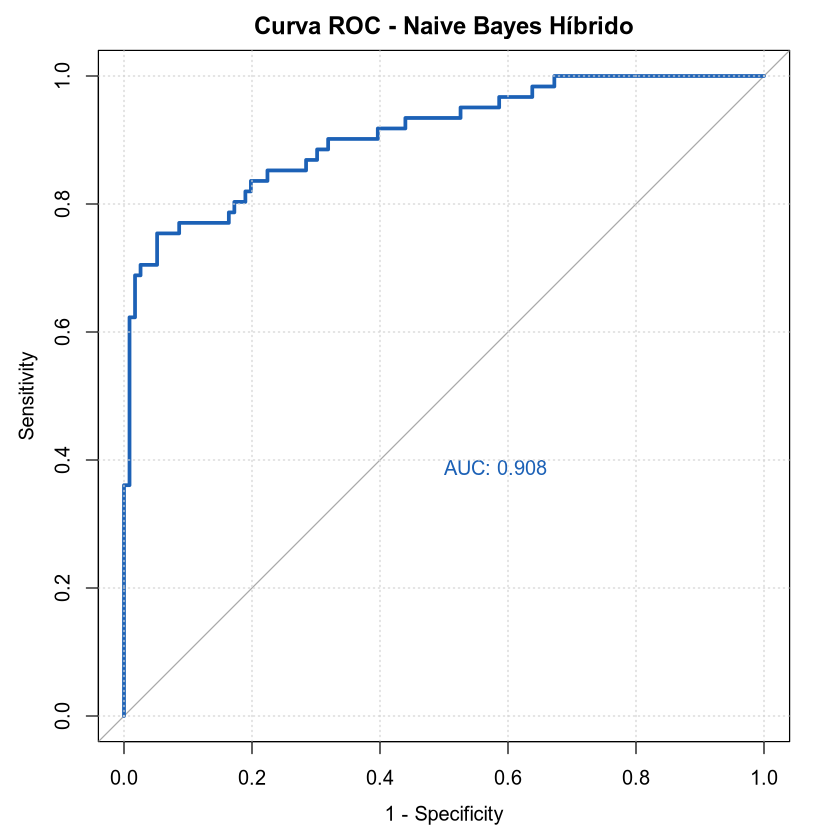

In [26]:
roc_obj <- roc(response = data_test_pkg$polarity, 
               predictor = pred_prob[, "1"],
               levels = c("0", "1"))

plot(roc_obj, 
     main = "Curva ROC - Naive Bayes Híbrido",
     col = "#1c61b6",  
     lwd = 3,           
     print.auc = TRUE,   
     print.auc.y = 0.4,
     legacy.axes = TRUE) 

grid()

El análisis de la curva ROC arroja un **AUC (Área Bajo la Curva) de 0.908**.

* **Excelencia del Modelo:** En ciencia de datos, un AUC superior a 0.9 se clasifica como **sobresaliente**. Indica que el modelo no solo acierta, sino que tiene una capacidad de discriminación muy superior al promedio.
* **Significado Probabilístico:** Este valor implica que, si seleccionamos aleatoriamente una review positiva y una negativa, existe un **90.8% de probabilidad** de que el modelo asigne correctamente una puntuación más alta a la positiva que a la negativa.
* **Confianza en la Predicción (Análisis de la Matriz):**
Al observar las probabilidades crudas (donde vemos valores extremos como `0.9999` o `9.10e-14`), confirmamos que el modelo es **decisivo**. No duda en la "frontera" (valores de 0.5), sino que cuando clasifica una review, lo hace con un grado de certeza muy alto, separando claramente ambas clases.

### 6.3. Análisis Lingüístico: ¿Por qué detecta mejor las quejas?

Observamos una asimetría en las métricas finales: el modelo es mejor detectando lo negativo (**Especificidad 85.3%**) que lo positivo (**Sensibilidad 77.0%**). Para entender la causa raíz, visualizamos el vocabulario.

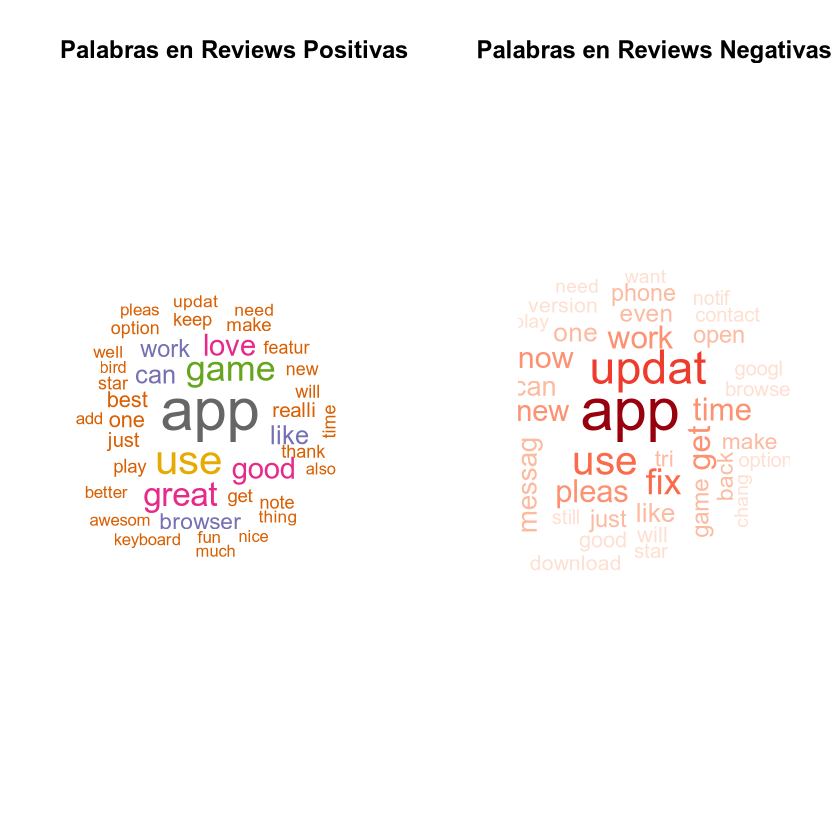

In [27]:
positive_corpus <- corpus_clean[df$polarity == 1]
negative_corpus <- corpus_clean[df$polarity == 0]

par(mfrow = c(1, 2)) 

wordcloud(positive_corpus, 
          min.freq = 10,     
          max.words = 40,   
          scale = c(3, 0.5), 
          colors = brewer.pal(8, "Dark2"),
          random.order = FALSE)
title("Palabras en Reviews Positivas")

wordcloud(negative_corpus, 
          min.freq = 10, 
          max.words = 40, 
          scale = c(3, 0.5), 
          colors = brewer.pal(8, "Reds"), 
          random.order = FALSE)
title("Palabras en Reviews Negativas")

par(mfrow = c(1, 1))

Al visualizar la frecuencia de términos, emergen tres patrones lingüísticos que explican el comportamiento del clasificador:

1. **El Fenómeno "App" (Término Neutro Dominante):**
Como se observa en el centro de ambas nubes, la palabra **"app"** es el término más grande y frecuente en ambas categorías.
    * Esto es lógico, ya que es el sujeto gramatical de casi todas las oraciones ("This app is...", "The app crashes..."). Sin embargo, esto implica que la palabra "app" tiene un **poder discriminante casi nulo**. No aporta información sobre el sentimiento; es ruido contextual que el modelo debe aprender a ignorar para centrarse en los adjetivos y verbos que la acompañan.


2. **Reviews Negativas (Vocabulario Correctivo):**
El vocabulario predominante es **técnico, urgente e inequívoco**.
    * Palabras clave: **"fix", "update", "problem", "crash", "error"**.
    * Estos términos actúan como "banderas rojas" muy claras. Rara vez se usan en un contexto positivo, lo que facilita enormemente la clasificación y explica por qué nuestra **Especificidad es tan alta (85.34%)**.


3. **Reviews Positivas (Vocabulario Afectivo Genérico):**
El lenguaje es **subjetivo y emocional**.
    * Palabras clave: **"good", "love", "great", "like", "best"**.
    * A diferencia de los términos técnicos, estas palabras sufren de mayor ambigüedad (polisemia). Un usuario puede decir *"Great, another bug"* (sarcasmo) o *"It looks good but doesn't work"*. Esta ambigüedad hace que la señal sea menos limpia que en las quejas, explicando por qué la **Sensibilidad (77.05%)** es ligeramente inferior.

### 6.4. Análisis de Negocio: Heterogeneidad del Rendimiento

**No. El modelo presenta una fuerte dependencia del dominio.**
Al desagregar la precisión por la variable `package_name`, hemos descubierto una brecha de rendimiento crítica condicionada por el sector de la aplicación:

1. **Sector de Alta Fiabilidad (Utilidades, Redes Sociales, Herramientas):**
    * **Rendimiento:** Sobresaliente (Cercano al **100%** de acierto en *Facebook* o *Teclados*).
    * Predomina la **Literalidad Funcional**. En estas apps, el usuario evalúa la utilidad: si funciona es "bueno", si falla es "malo". No existen dobles sentidos ni jerga, lo que facilita la clasificación para un modelo basado en frecuencias de palabras.


2. **Sector de Desempeño Crítico (Gaming / Videojuegos):**
    * **Rendimiento:** Deficiente (Cae hasta el **28%** en *Temple Run 2*).
    * El modelo sufre por **Polisemia Contextual**.
        * El algoritmo, entrenado mayoritariamente con quejas de utilidades, ha aprendido que palabras como **"hard"** (difícil), **"killer"** (matador) o **"addictive"** (adictivo) son negativas.
        * Sin embargo, en el contexto *Gamer*, estos términos denotan reto y diversión (sentimiento positivo). El modelo no entiende este cambio de significado, generando una gran cantidad de **Falsos Negativos**.

### 6.5. Recomendaciones Estratégicas y Futuras Líneas de Trabajo

Para evolucionar este prototipo hacia una solución de producción capaz de corregir el sesgo en el sector *Gaming*, proponemos las siguientes mejoras en la arquitectura de datos:

1. **Segmentación de Modelos por Dominio (Prioridad Alta):**
El fallo sistemático en videojuegos demuestra que un enfoque de "talla única" (*one-size-fits-all*) es ineficiente ante cambios semánticos drásticos.
    * **Propuesta:** Implementar una arquitectura de **Ensemble** o modelos en cascada.
        * *Modelo A (Generalista):* Para utilidades y redes sociales.
        * *Modelo B (Específico):* Entrenado exclusivamente con corpus de videojuegos. Esto permitiría "re-aprender" pesos: en este sub-modelo, la palabra "killer" sumaría puntos a la clase Positiva, corrigiendo los falsos negativos actuales.


2. **Incorporación de Contexto Local (Bigramas):**
Nuestro modelo actual se basa en *Unigramas* (palabras sueltas), lo que le hace ciego a la estructura de la frase.
    * **Problema:** El modelo ve "not good" y procesa "good" (positivo) ignorando el "not".
    * **Solución:** Ampliar la matriz de términos para incluir **Bigramas** (pares de palabras). Esto convertiría "not good" en un token único negativo, capturando la **negación sintáctica** que actualmente se pierde.


3. **Minería de Emojis y Caracteres Especiales:**
En el contexto de reviews móviles, la expresividad se comprime a menudo en emojis (😡, 👎, ⭐, 😍).
    * **Mejora:** Modificar el pipeline de limpieza para no eliminar estos caracteres. Tratarlos como tokens de alta densidad semántica (un solo emoji puede tener más peso predictivo que cinco adjetivos) aumentaría la precisión en reviews cortas.


4. **Aumento de Muestra en Clases Minoritarias (Data Augmentation):**
Hemos detectado inestabilidad estadística en apps como *Slack* o *Firefox*, que contaban con muestras marginales en el test (4-7 instancias).
    * Para garantizar que los resultados sean generalizables y no anecdóticos, es imperativo realizar una campaña de recolección de datos dirigida (*Targeted Scraping*) para equilibrar el dataset y asegurar un mínimo de N>50 reviews por aplicación.